# Predicción de indice contaminante

In [1]:
# Importamos librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import svm


In [2]:
# Importar datos
indice_contaminacion = pd.read_csv(r'indice_contaminacion.csv')
solicitud_locatel = pd.read_csv(r"Solicitud_Locatel.csv")
tiempo = pd.read_csv(r"Tiempo.csv")
zona = pd.read_csv(r"Zona.csv")
tipo_contaminante = pd.read_csv(r"Tipo Contaminante.csv")

In [3]:
# Observar datos
indice_contaminacion.head()


,idContaminacion,indiceContaminante,idTipoContaminante,idZona,idTiempo,esNulo
0,0,NaN,36,0,0,1
1,1,5.0,1,0,0,0
2,2,NaN,38,0,0,1
3,3,10.0,15,0,0,0
4,4,64.0,22,0,0,0


In [4]:
solicitud_locatel

,idSolicitud,tipoEntrada,estatusSolicitud,sexo,edad,idZona,idTiempo
0,0,USUARIOS SUAC DEPENDENCIA,ATENDIDO,MASCULINO,NaN,2,4623
1,1,PORTAL CIUDADANO SUAC,ATENDIDO,FEMENINO,NaN,3,3683
2,2,PORTAL CIUDADANO SUAC,ATENDIDO,FEMENINO,60.0,3,3683
3,3,OPERADOR TELEFÓNICO LOCATEL,ATENDIDO,FEMENINO,23.0,1,3683
4,4,PORTAL CIUDADANO SUAC,ATENDIDO,NO ESPECIFICADO,NaN,3,3683
...,...,...,...,...,...,...,...
82016,82016,PORTAL CIUDADANO SUAC,CERRADO,NaN,NaN,0,31650
82017,82017,PORTAL CIUDADANO SUAC,CERRADO,NaN,NaN,0,31651
82018,82018,PORTAL CIUDADANO SUAC,TURNADO,NaN,NaN,0,31739
82019,82019,PORTAL CIUDADANO SUAC,TURNADO,NaN,NaN,1,31793


In [5]:
tiempo.head()

,idTiempo,año,semestre,trimestre,bimestre,mes,dia,hora,esFestivo
0,0,2019,1,1,1,1,1,0,1
1,1,2019,1,1,1,1,1,1,1
2,2,2019,1,1,1,1,1,2,1
3,3,2019,1,1,1,1,1,3,1
4,4,2019,1,1,1,1,1,4,1


In [6]:
tipo_contaminante.head()

,idTipoContaminante,nombreContaminante,tipoPeligrosidad
0,0,ozono,0
1,1,dióxido de azufre,0
2,2,dióxido de nitrógeno,0
3,3,monóxido de carbono,0
4,4,PM10,0


In [7]:
# Reemplazar idZona con nombre de zona desde dataframe Zona
# Hacer diccionario con idZona y nombre de zona
zona_dict = dict(zip(zona.idZona, zona.zonaCDMX))
zona_dict

# Reemplazar idZona con nombre de zona
indice_contaminacion['nombreZona'] = indice_contaminacion['idZona'].map(zona_dict)
indice_contaminacion

# Hacer diccionario con tiempo idTiempo,año,semestre,trimestre,bimestre,mes,dia,hora,esFestivo
tiempo_dict_anio = dict(zip(tiempo.idTiempo, tiempo.año))
tiempo_dict_mes = dict(zip(tiempo.idTiempo, tiempo.mes))
tiempo_dict_dia = dict(zip(tiempo.idTiempo, tiempo.dia))

# Reemplazar idTiempo con año
indice_contaminacion['año'] = indice_contaminacion['idTiempo'].map(tiempo_dict_anio)
indice_contaminacion['mes'] = indice_contaminacion['idTiempo'].map(tiempo_dict_mes)
indice_contaminacion['dia'] = indice_contaminacion['idTiempo'].map(tiempo_dict_dia)

# Juntar dia, mes y año en una sola columna y eliminar las otras 3
indice_contaminacion['fecha'] = indice_contaminacion['dia'].astype(str) + '-' + indice_contaminacion['mes'].astype(str) + '-' + indice_contaminacion['año'].astype(str)

# Convertir fecha a datetime
indice_contaminacion['fecha'] = pd.to_datetime(indice_contaminacion['fecha'], format='%d-%m-%Y')
indice_contaminacion = indice_contaminacion.drop(['dia', 'mes', 'año'], axis=1)


# Reemplazar idTipoContaminante con nombre de tipo de contaminante desde dataframe Tipo Contaminante idTipoContaminante,nombreContaminante,tipoPeligrosidad
# Hacer diccionario con idTipoContaminante y nombre de tipo de contaminante
tipo_contaminante_dict = dict(zip(tipo_contaminante.idTipoContaminante, tipo_contaminante.nombreContaminante))

# Reemplazar idTipoContaminante con nombre de tipo de contaminante
indice_contaminacion['tipoContaminante'] = indice_contaminacion['idTipoContaminante'].map(tipo_contaminante_dict)


# Revisar nulos
indice_contaminacion.isnull().sum()

idContaminacion           0
indiceContaminante    17558
idTipoContaminante        0
idZona                    0
idTiempo                  0
esNulo                    0
nombreZona                0
fecha                     0
tipoContaminante          0
dtype: int64

In [8]:
# Revisar que tipoContaminante y zona tiene mas nulos
indice_contaminacion


,idContaminacion,indiceContaminante,idTipoContaminante,idZona,idTiempo,esNulo,nombreZona,fecha,tipoContaminante
0,0,NaN,36,0,0,1,Noroeste,2019-01-01,ozono
1,1,5.0,1,0,0,0,Noroeste,2019-01-01,dióxido de azufre
2,2,NaN,38,0,0,1,Noroeste,2019-01-01,dióxido de nitrógeno
3,3,10.0,15,0,0,0,Noroeste,2019-01-01,monóxido de carbono
4,4,64.0,22,0,0,0,Noroeste,2019-01-01,PM10
...,...,...,...,...,...,...,...,...,...
964075,964075,4.0,1,4,32135,0,Sureste,2022-08-31,dióxido de azufre
964076,964076,13.0,2,4,32135,0,Sureste,2022-08-31,dióxido de nitrógeno
964077,964077,4.0,3,4,32135,0,Sureste,2022-08-31,monóxido de carbono
964078,964078,30.0,10,4,32135,0,Sureste,2022-08-31,PM10


In [9]:
indice_contaminacion['indiceContaminante_nulos'] = indice_contaminacion['indiceContaminante'].isna()

In [10]:
tipoContaminante_nulos = indice_contaminacion.groupby('tipoContaminante').sum()['indiceContaminante_nulos']
nombreZona_nulos = indice_contaminacion.groupby('nombreZona').sum()['indiceContaminante_nulos']
nulos_por_tipo_y_zona = indice_contaminacion.groupby(['tipoContaminante', 'nombreZona']).sum()['indiceContaminante_nulos']

/var/folders/h4/61symv9x3_5991plfxzgzsv80000gn/T/ipykernel_66372/501219072.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tipoContaminante_nulos = indice_contaminacion.groupby('tipoContaminante').sum()['indiceContaminante_nulos']
/var/folders/h4/61symv9x3_5991plfxzgzsv80000gn/T/ipykernel_66372/501219072.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  nombreZona_nulos = indice_contaminacion.groupby('nombreZona').sum()['indiceContaminante_nulos']
/var/folders/h4/61symv9x3_5991plfxzgzsv80000gn/T/ipykernel_66372/501219072.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is d

In [11]:

print("Tipo de contaminante y zona con más nulos: ", nulos_por_tipo_y_zona)

Tipo de contaminante y zona con más nulos:  tipoContaminante      nombreZona
PM10                  Centro           5
                      Noreste        161
                      Noroeste        73
                      Sureste        907
                      Suroeste       201
PM25                  Centro         260
                      Noreste        225
                      Noroeste      1738
                      Sureste         82
                      Suroeste       189
dióxido de azufre     Centro           1
                      Noreste          0
                      Noroeste         1
                      Sureste         16
                      Suroeste         1
dióxido de nitrógeno  Centro         704
                      Noreste        728
                      Noroeste       744
                      Sureste        755
                      Suroeste       735
monóxido de carbono   Centro        1195
                      Noreste       1226
                     

In [12]:
# Promedio de indice por cada tipo de contaminante
indice_contaminacion.groupby('tipoContaminante').mean()['indiceContaminante']

/var/folders/h4/61symv9x3_5991plfxzgzsv80000gn/T/ipykernel_66372/1576927866.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  indice_contaminacion.groupby('tipoContaminante').mean()['indiceContaminante']


tipoContaminante
PM10                    58.397928
PM25                    65.400193
dióxido de azufre        8.169201
dióxido de nitrógeno    13.260340
monóxido de carbono      4.745366
ozono                   30.156003
Name: indiceContaminante, dtype: float64

In [13]:
# Interpolar nulos por tipo de contaminante y zona
indice_contaminacion['indiceContaminante'] = indice_contaminacion.groupby(['tipoContaminante', 'nombreZona'])['indiceContaminante'].transform(lambda x: x.interpolate(method='linear', limit_direction='both'))

In [14]:
# Promedio de indice por cada tipo de contaminante
indice_contaminacion.groupby('tipoContaminante').mean()['indiceContaminante']

/var/folders/h4/61symv9x3_5991plfxzgzsv80000gn/T/ipykernel_66372/1576927866.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  indice_contaminacion.groupby('tipoContaminante').mean()['indiceContaminante']


tipoContaminante
PM10                    58.233333
PM25                    65.258508
dióxido de azufre        8.169399
dióxido de nitrógeno    13.255887
monóxido de carbono      4.765686
ozono                   29.846440
Name: indiceContaminante, dtype: float64

In [15]:
# Revisar nulos
indice_contaminacion.isnull().sum()

# iniciar el dataframe desde 2019-01-01, recortar los datos anteriores
indice_contaminacion = indice_contaminacion[indice_contaminacion['fecha'] >= '2019-01-01']
indice_contaminacion

,idContaminacion,indiceContaminante,idTipoContaminante,idZona,idTiempo,esNulo,nombreZona,fecha,tipoContaminante,indiceContaminante_nulos
0,0,6.0,36,0,0,1,Noroeste,2019-01-01,ozono,True
1,1,5.0,1,0,0,0,Noroeste,2019-01-01,dióxido de azufre,False
2,2,17.0,38,0,0,1,Noroeste,2019-01-01,dióxido de nitrógeno,True
3,3,10.0,15,0,0,0,Noroeste,2019-01-01,monóxido de carbono,False
4,4,64.0,22,0,0,0,Noroeste,2019-01-01,PM10,False
...,...,...,...,...,...,...,...,...,...,...
964075,964075,4.0,1,4,32135,0,Sureste,2022-08-31,dióxido de azufre,False
964076,964076,13.0,2,4,32135,0,Sureste,2022-08-31,dióxido de nitrógeno,False
964077,964077,4.0,3,4,32135,0,Sureste,2022-08-31,monóxido de carbono,False
964078,964078,30.0,10,4,32135,0,Sureste,2022-08-31,PM10,False


In [16]:
# En Solicitud_Locatel reemplazar idZona,idTiempo con nombre de zona y año
# Hacer diccionario con idZona y nombre de zona
zona_dict = dict(zip(zona.idZona, zona.zonaCDMX))

# Reemplazar idZona con nombre de zona
solicitud_locatel['nombreZona'] = solicitud_locatel['idZona'].map(zona_dict)

# Hacer diccionario con tiempo idTiempo,año,semestre,trimestre,bimestre,mes,dia,hora,esFestivo
tiempo_dict_anio = dict(zip(tiempo.idTiempo, tiempo.año))
tiempo_dict_mes = dict(zip(tiempo.idTiempo, tiempo.mes))
tiempo_dict_dia = dict(zip(tiempo.idTiempo, tiempo.dia))

# Reemplazar idTiempo con año
solicitud_locatel['año'] = solicitud_locatel['idTiempo'].map(tiempo_dict_anio)
solicitud_locatel['mes'] = solicitud_locatel['idTiempo'].map(tiempo_dict_mes)
solicitud_locatel['dia'] = solicitud_locatel['idTiempo'].map(tiempo_dict_dia)

# Juntar dia, mes y año en una sola columna y eliminar las otras 3
solicitud_locatel['fecha'] = solicitud_locatel['dia'].astype(str) + '/' + solicitud_locatel['mes'].astype(str) + '/' + solicitud_locatel['año'].astype(str)
solicitud_locatel = solicitud_locatel.drop(['dia', 'mes', 'año'], axis=1)

# Convertir fecha a datetime
solicitud_locatel['fecha'] = pd.to_datetime(solicitud_locatel['fecha'], format='%d/%m/%Y')

# Interpolar los nulos de edad
solicitud_locatel['edad'] = solicitud_locatel['edad'].interpolate(method='linear', limit_direction='both')

# Revisar nulos
solicitud_locatel.isnull().sum()

# Cambiar nulls de sexo por 'No especificado'
solicitud_locatel['sexo'] = solicitud_locatel['sexo'].fillna('No especificado')



In [17]:
# Revisar nulos
print("Los nulos para locatel son:", solicitud_locatel.isnull().sum())
print("Los nulos para indice contaminacion son:", indice_contaminacion.isnull().sum())

Los nulos para locatel son: idSolicitud         0
tipoEntrada         0
estatusSolicitud    0
sexo                0
edad                0
idZona              0
idTiempo            0
nombreZona          0
fecha               0
dtype: int64
Los nulos para indice contaminacion son: idContaminacion             0
indiceContaminante          0
idTipoContaminante          0
idZona                      0
idTiempo                    0
esNulo                      0
nombreZona                  0
fecha                       0
tipoContaminante            0
indiceContaminante_nulos    0
dtype: int64


In [18]:
# Unir los datasets en base a idZona y idTiempo

merged_data = pd.merge(solicitud_locatel, indice_contaminacion, on=['idZona', 'idTiempo'],suffixes=('', '_y'))


print(merged_data)

        idSolicitud                tipoEntrada estatusSolicitud  \
0                 0  USUARIOS SUAC DEPENDENCIA         ATENDIDO   
1                 0  USUARIOS SUAC DEPENDENCIA         ATENDIDO   
2                 0  USUARIOS SUAC DEPENDENCIA         ATENDIDO   
3                 0  USUARIOS SUAC DEPENDENCIA         ATENDIDO   
4                 0  USUARIOS SUAC DEPENDENCIA         ATENDIDO   
...             ...                        ...              ...   
492121        82004      PORTAL CIUDADANO SUAC          CERRADO   
492122        82004      PORTAL CIUDADANO SUAC          CERRADO   
492123        82004      PORTAL CIUDADANO SUAC          CERRADO   
492124        82004      PORTAL CIUDADANO SUAC          CERRADO   
492125        82004      PORTAL CIUDADANO SUAC          CERRADO   

                   sexo  edad  idZona  idTiempo nombreZona      fecha  \
0             MASCULINO  60.0       2      4623     Centro 2019-07-12   
1             MASCULINO  60.0       2      4623  

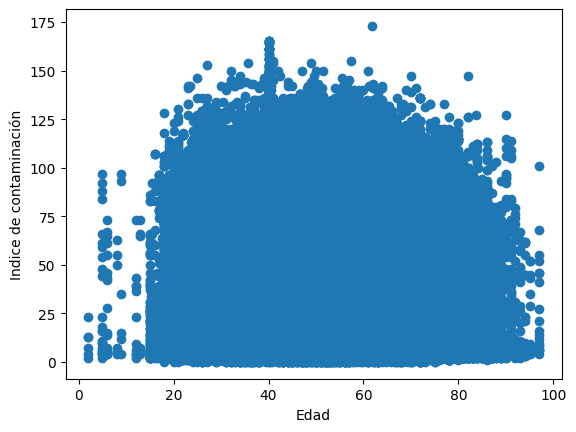

In [19]:
# Gráfico de dispersión
plt.scatter(merged_data['edad'], merged_data['indiceContaminante'])
plt.xlabel('Edad')
plt.ylabel('Indice de contaminación')
plt.show()

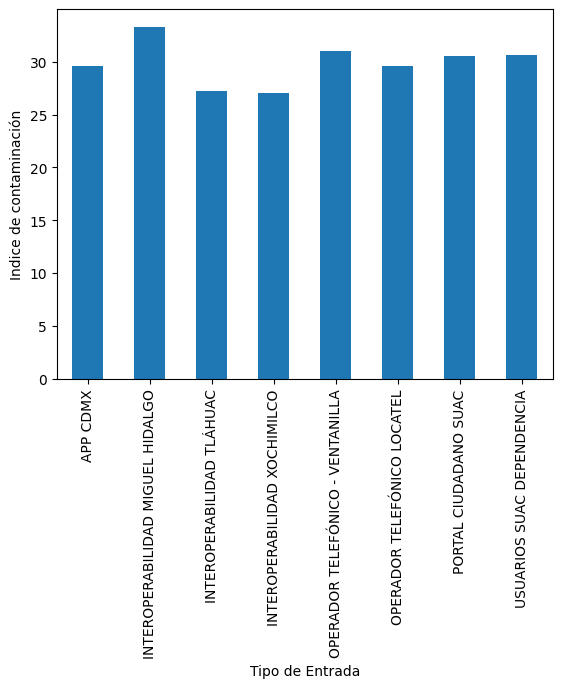

In [20]:
# Gráfico de barras
merged_data.groupby(['tipoEntrada'])['indiceContaminante'].mean().plot(kind='bar')
plt.xlabel('Tipo de Entrada')
plt.ylabel('Indice de contaminación')
plt.show()

/var/folders/h4/61symv9x3_5991plfxzgzsv80000gn/T/ipykernel_66372/3021531775.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = merged_data.corr()


                          idSolicitud      edad    idZona  idTiempo  \
idSolicitud                  1.000000 -0.284686  0.068621  0.990295   
edad                        -0.284686  1.000000 -0.028027 -0.288313   
idZona                       0.068621 -0.028027  1.000000  0.051477   
idTiempo                     0.990295 -0.288313  0.051477  1.000000   
idContaminacion              0.990295 -0.288313  0.051507  1.000000   
indiceContaminante          -0.016542 -0.004049 -0.067909 -0.007685   
idTipoContaminante          -0.009933 -0.002606 -0.040671 -0.006321   
esNulo                      -0.011122  0.003688 -0.023511 -0.013019   
indiceContaminante_nulos    -0.011122  0.003688 -0.023511 -0.013019   

                          idContaminacion  indiceContaminante  \
idSolicitud                      0.990295           -0.016542   
edad                            -0.288313           -0.004049   
idZona                           0.051507           -0.067909   
idTiempo                     

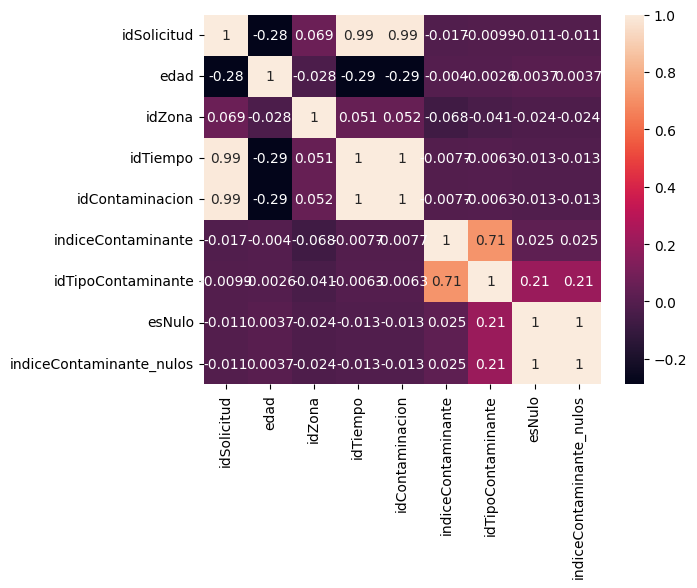

In [21]:
correlation_matrix = merged_data.corr()
print(correlation_matrix)

# Graficarlo
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [22]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [23]:
X = merged_data[['idZona', 'idTipoContaminante','idTiempo']]
y = merged_data['indiceContaminante']

In [24]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

12.507594245202817
[ 0.00000000e+00 -1.24295747e+00  2.00977472e+00  2.15725183e-04
  1.65484675e-01 -3.50976513e-02  7.49616127e-06 -6.65971299e-03
  4.41559896e-06 -7.39648734e-09]
Error absoluto medio: 14.059369390596885
Error cuadrático medio: 391.3362703761834
Raíz del error cuadrático medio: 19.78222106782207
Coeficiente de determinación: 0.5134441369409537


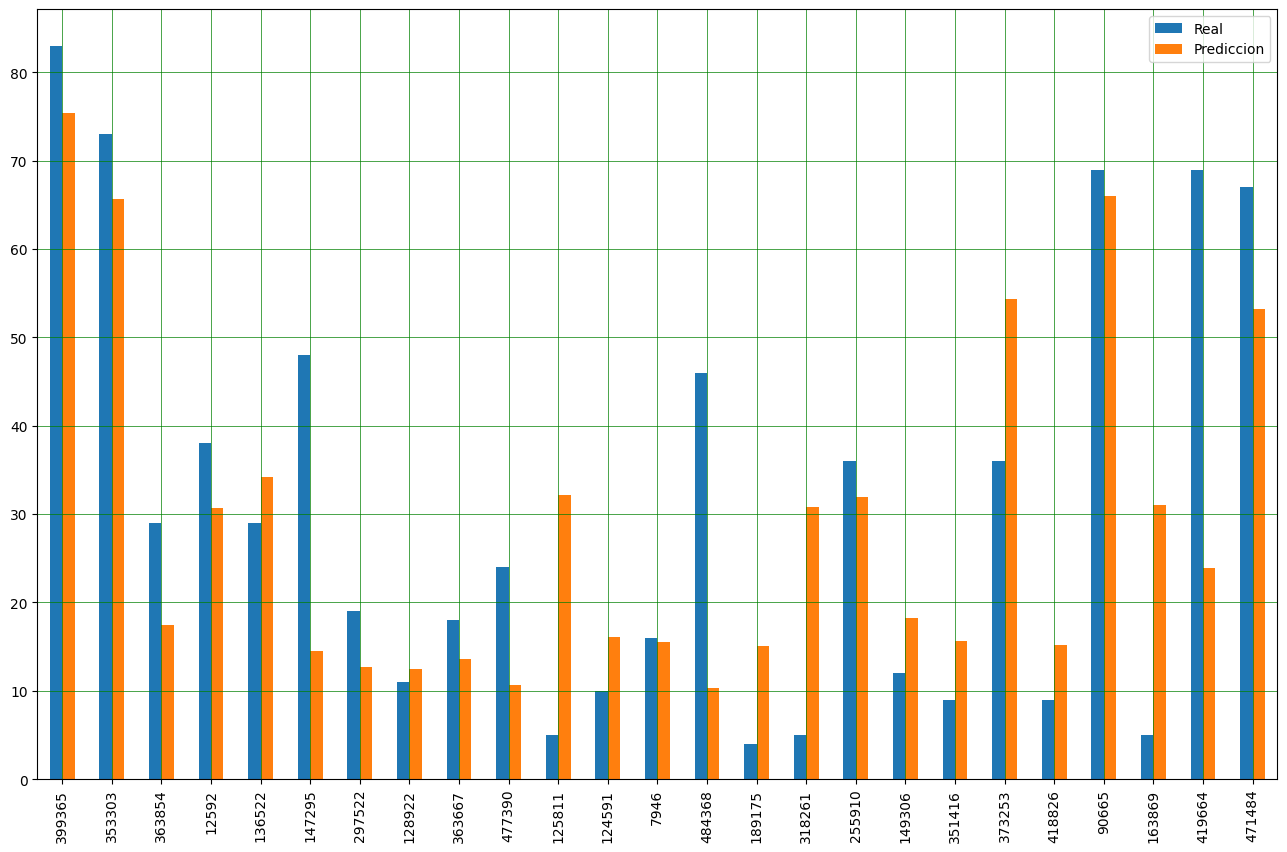

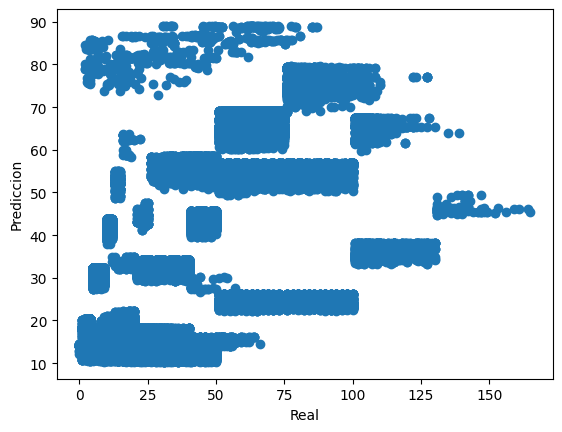

In [25]:
# crear un objeto de la clase LinearRegression y ajustarlo al conjunto de datos
model = LinearRegression()

# dividir el conjunto de datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=0)

# ajustar el modelo
model.fit(X_train, y_train)

# obtener el valor de la intersección
print(model.intercept_)

# obtener los valores de los coeficientes
print(model.coef_)

# predecir el conjunto de prueba
y_pred = model.predict(X_test)

# comparar los valores reales y los valores predichos
df = pd.DataFrame({'Real': y_test, 'Prediccion': y_pred})

# calcular el error absoluto medio
from sklearn import metrics

print('Error absoluto medio:', metrics.mean_absolute_error(y_test, y_pred))

# calcular el error cuadrático medio
print('Error cuadrático medio:', metrics.mean_squared_error(y_test, y_pred))

# calcular la raíz del error cuadrático medio

print('Raíz del error cuadrático medio:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# calcular el coeficiente de determinación
print('Coeficiente de determinación:', metrics.r2_score(y_test, y_pred))


# Gráfico de barras
df1 = df.head(25)
df1.plot(kind='bar', figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# Gráfico de dispersión
plt.scatter(y_test, y_pred)
plt.xlabel('Real')
plt.ylabel('Prediccion')
plt.show()

In [26]:
%pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


Epoch 1/100
39370/39370 [==============================] - 16s 396us/step - loss: 443.7639 - mean_squared_error: 443.7639
Epoch 2/100
39370/39370 [==============================] - 17s 428us/step - loss: 397.8867 - mean_squared_error: 397.8867
Epoch 3/100
39370/39370 [==============================] - 15s 392us/step - loss: 395.4812 - mean_squared_error: 395.4812
Epoch 4/100
39370/39370 [==============================] - 16s 394us/step - loss: 387.0298 - mean_squared_error: 387.0298
Epoch 5/100
39370/39370 [==============================] - 15s 392us/step - loss: 379.6283 - mean_squared_error: 379.6283
Epoch 6/100
39370/39370 [==============================] - 15s 393us/step - loss: 376.3843 - mean_squared_error: 376.3843
Epoch 7/100
39370/39370 [==============================] - 15s 391us/step - loss: 368.0691 - mean_squared_error: 368.0691
Epoch 8/100
39370/39370 [==============================] - 16s 395us/step - loss: 359.8078 - mean_squared_error: 359.8078
Epoch 9/100
39370/39370 

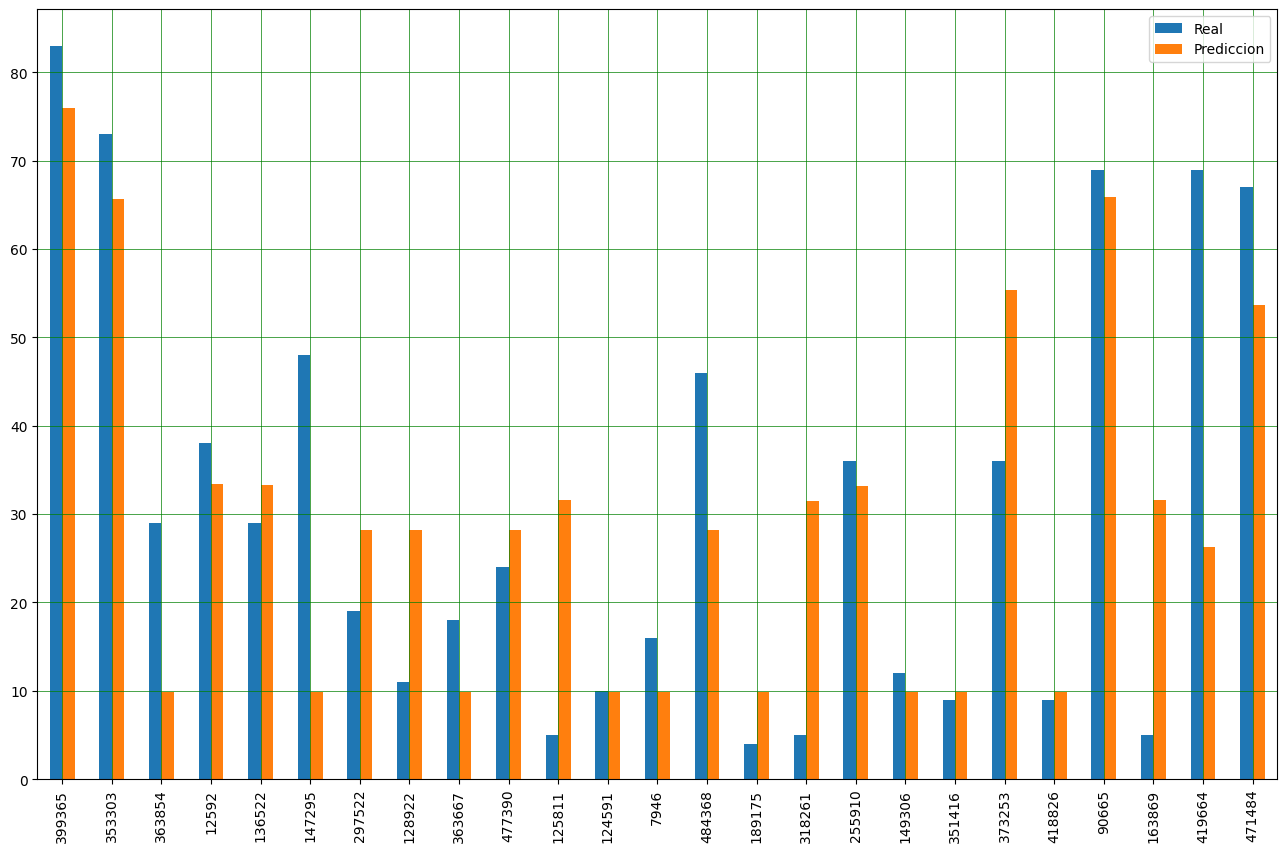

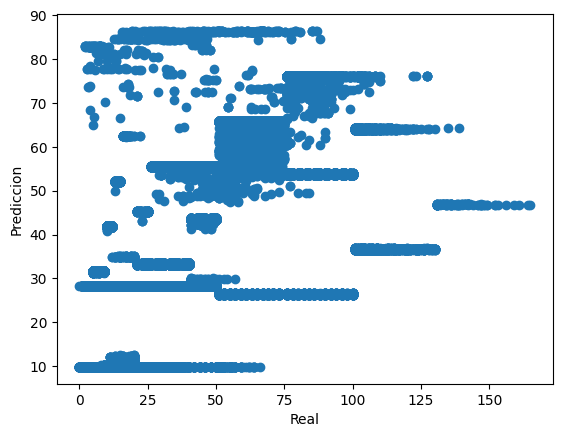

In [28]:
# Iniciar red neuronal para regresión multiple con 3 capas ocultas de 10 neuronas cada una y 1 capa de salida

# Importar librerías
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split

# Dividir el dataset en conjunto de entrenamiento y conjunto de testing (80% train, 19% prueba y 1% validación)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Inicializar la red neuronal
regressor = Sequential()

# Añadir las capas de entrada y primera capa oculta
regressor.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu', input_dim = 3))

# Añadir la segunda capa oculta
regressor.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu'))

# Añadir la tercera capa oculta
regressor.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu'))

# Añadir la capa de salida
regressor.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'linear'))

# Compilar la red neuronal
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mean_squared_error'])

# Ajustar la red neuronal al conjunto de entrenamiento
regressor.fit(X_train, y_train, batch_size = 10, epochs = 100)

# Predecir los resultados del conjunto de testing
y_pred = regressor.predict(X_test)

# Comparar los valores reales y los valores predichos
df = pd.DataFrame({'Real': y_test, 'Prediccion': y_pred.flatten()})

# calcular el error absoluto medio
from sklearn import metrics

print('Error absoluto medio:', metrics.mean_absolute_error(y_test, y_pred))

# calcular el error cuadrático medio
print('Error cuadrático medio:', metrics.mean_squared_error(y_test, y_pred))

# calcular la raíz del error cuadrático medio

print('Raíz del error cuadrático medio:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# calcular el coeficiente de determinación
print('Coeficiente de determinación:', metrics.r2_score(y_test, y_pred))

# Gráfico de barras
df1 = df.head(25)
df1.plot(kind='bar', figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# Gráfico de dispersión
plt.scatter(y_test, y_pred)
plt.xlabel('Real')
plt.ylabel('Prediccion')
plt.show() 